# Tests

In [35]:
import numpy as np
import pandas as pd
from scipy.cluster import hierarchy
from scipy.spatial.distance import pdist
from sklearn.cluster import AgglomerativeClustering
from MulticoreTSNE import MulticoreTSNE as TSNE

from matplotlib import cm

In [2]:
X = np.load('../data/mnist/X.npy')
y = np.load('../data/mnist/y.npy')

In [3]:
from sklearn.model_selection import train_test_split
X_train, _, y_train, _ = train_test_split(X, y, train_size=5_000, stratify=y)

In [4]:
print(f'{X_train.shape}, {y_train.shape}')

(5000, 784), (5000,)


In [5]:
tsne = TSNE(n_jobs=16)
X_tsne = tsne.fit_transform(X_train)

In [6]:
X_tsne

array([[-27.24074195,  -3.72493109],
       [-15.58751375, -17.99009848],
       [  1.6599236 ,  10.07939832],
       ...,
       [ -7.08436614,  -1.27907436],
       [ 37.58565746, -17.42146797],
       [ 20.68739137,  30.2633362 ]])

In [7]:
import jscatter
jscatter.plot(X_tsne[:, 0], X_tsne[:, 1], color_by=tuple(y_train), height=480, size=5, opacity=0.7)

In [91]:
X_tsne_0 = X_tsne[y_train == 0]

Z = hierarchy.average(pdist(X_tsne_0))

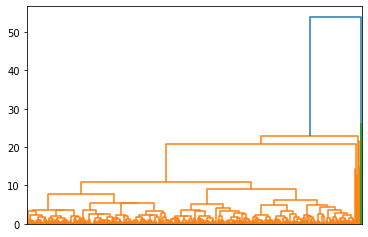

In [92]:
_ = hierarchy.dendrogram(Z, no_labels=True)

In [103]:
flat_clusters = hierarchy.fcluster(Z, t=20.0, criterion='distance')
flat_clusters

array([1, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 6, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1,

In [104]:
biggest_cluster = np.argmax(np.bincount(flat_clusters))
print(biggest_cluster)

1


In [105]:
jscatter.plot(X_tsne_0[:, 0], X_tsne_0[:, 1],
              color_by=tuple(flat_clusters),
              color_map=cm.tab10,
              opacity_map=((flat_clusters == biggest_cluster)*0.4 + 0.5),
              height=500,
              size=5)

In [106]:
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest

In [116]:
elliptic_env = EllipticEnvelope()
elliptic_preds = elliptic_env.fit_predict(X_tsne_0)

In [119]:
p = jscatter.Scatter(X_tsne_0[:, 0], X_tsne_0[:, 1], color_by=tuple(elliptic_preds), color_map=jscatter.okabe_ito, height=500)
p.show()

In [120]:
isolation = IsolationForest(n_jobs=16)
isolation_preds = isolation.fit_predict(X_tsne_0)

In [121]:
jscatter.plot(X_tsne_0[:, 0], X_tsne_0[:, 1], color_by=tuple(isolation_preds), color_map=jscatter.okabe_ito, height=500)

In [142]:
classes = np.unique(y_train)


assignments = -np.ones_like(y_train, dtype=np.float32)
for c in classes:
    class_data = X_train[y_train == c]
    isolation_preds = IsolationForest(n_jobs=16).fit_predict(class_data)
    assignments[y_train == c] = np.where(isolation_preds == 1, c, -1)
    
jscatter.plot(X_tsne[:, 0], X_tsne[:, 1], color_by=tuple(assignments), color_map=jscatter.okabe_ito, height=500)

In [143]:
import matplotlib.pyplot as plt

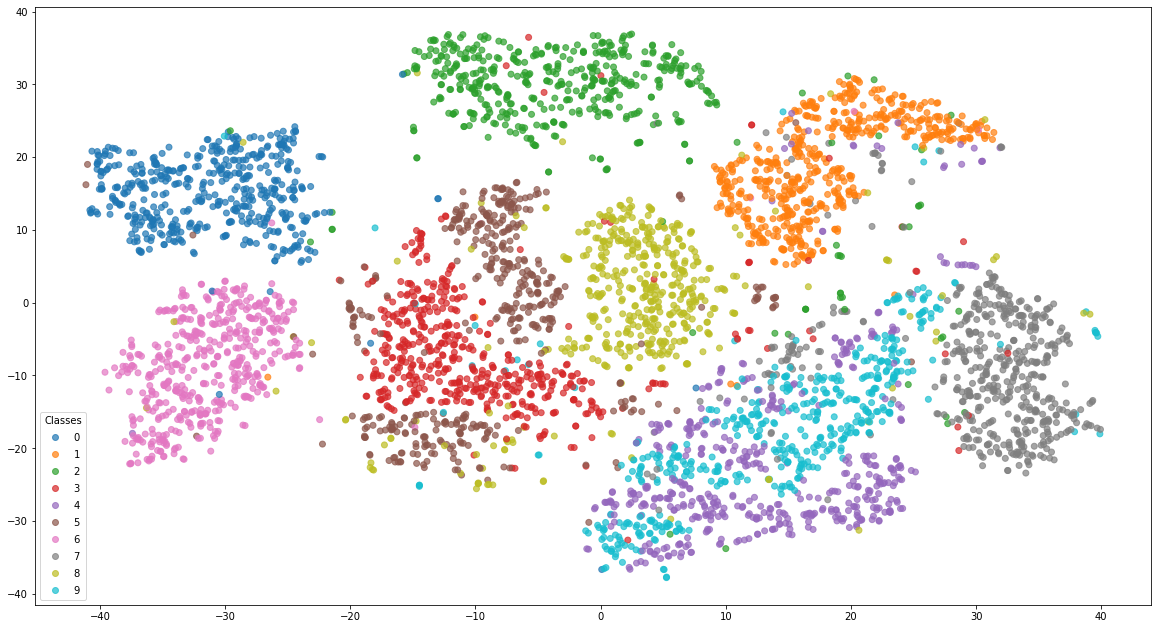

In [144]:
plt.subplots(figsize=(20, 11))
scatter = plt.scatter(X_tsne[assignments != -1, 0], X_tsne[assignments != -1, 1], c=assignments[assignments != -1], cmap='tab10', alpha=0.7)

legend1 = plt.legend(*scatter.legend_elements(),
                    loc="lower left", title="Classes")

# Showing metric + overlaid hulls

## Imports

In [147]:
import matplotlib.pyplot as plt
import numpy as np
from MulticoreTSNE import MulticoreTSNE as TSNE
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from scipy.spatial import ConvexHull, convex_hull_plot_2d
from scipy.stats import spearmanr

## The stuff

In [154]:
def cluster_size_consistency(X_high, y, X_proj, n_classes=None, return_hulls=False):
    if n_classes is None:
        n_classes = len(np.unique(y))
    variances = np.zeros(n_classes, dtype=np.float32)
    areas = np.zeros_like(variances)
    hulls = [None for _ in range(n_classes)]
    for cl in range(n_classes):
        orig_class_data = X_high[y == cl]
        proj_class_data = X_proj[y == cl]
        main_cluster_points = proj_class_data[IsolationForest().fit_predict(proj_class_data) == 1]
        hull = ConvexHull(main_cluster_points, incremental=False)
        hulls[cl] = hull
        areas[cl] = hull.area
        variances[cl] = np.trace(np.cov(orig_class_data, rowvar=False)) / proj_class_data.shape[0]
    return spearmanr(variances, areas), hulls

In [149]:
X, y = np.load('../data/mnist/X.npy'), np.load('../data/mnist/y.npy')

In [150]:
X_train, _, y_train, _ = train_test_split(X, y, train_size=5_000, stratify=y)

In [153]:
X_tsne = TSNE(n_jobs=16).fit_transform(X_train)

In [155]:
consistency_score, hulls = cluster_size_consistency(X_train, y_train, X_tsne, return_hulls=True)

In [156]:
print(consistency_score)

SpearmanrResult(correlation=-0.2727272727272727, pvalue=0.44583834154275137)


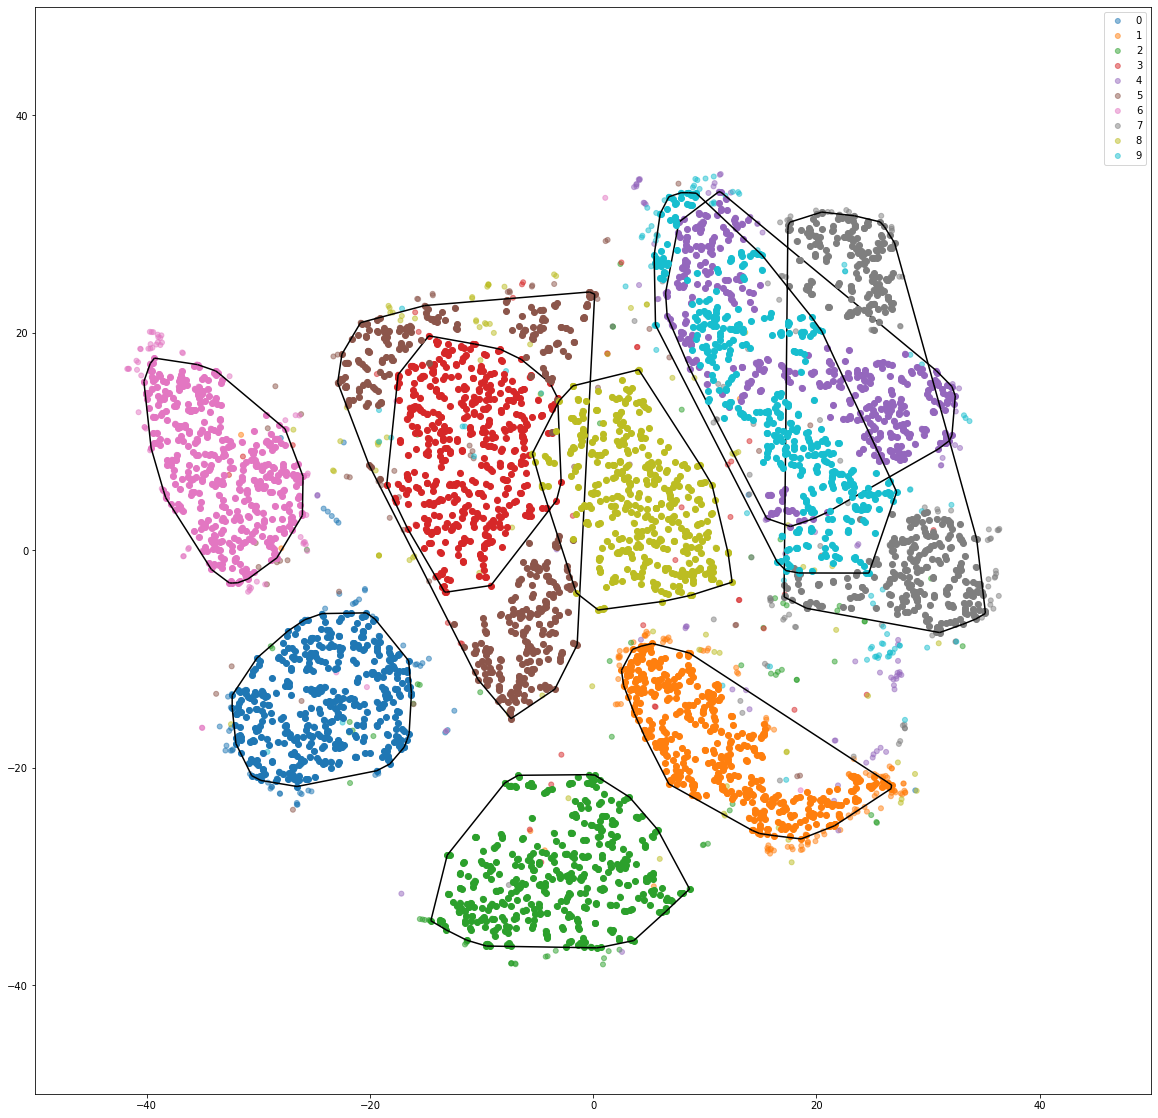

In [180]:
fig, ax = plt.subplots(figsize=(20, 20))
for h in hulls:
    convex_hull_plot_2d(h, ax=ax)

for cl in range(10):
    class_data = X_tsne[y_train == cl, :]
    ax.scatter(class_data[:, 0], class_data[:, 1], c=[plt.cm.tab10(cl) for _ in range(class_data.shape[0])], label=cl, s=25, alpha=0.5) 
ax.set_xlim((-50, 50))
ax.set_ylim((-50, 50))
plt.legend()
plt.show()

ImportError: attempted relative import with no known parent package